<a href="https://colab.research.google.com/github/jyoeti/Bird-Strike/blob/main/Bird_strike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Bird Strikes data.csv')

In [ ]:
df.head(2)

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,11/23/00 0:00,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736","1,500",0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,7/25/01 0:00,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Record ID                                25558 non-null  int64 
 1   Aircraft: Type                           25429 non-null  object
 2   Airport: Name                            25429 non-null  object
 3   Altitude bin                             25429 non-null  object
 4   Aircraft: Make/Model                     25558 non-null  object
 5   Wildlife: Number struck                  25429 non-null  object
 6   Wildlife: Number Struck Actual           25558 non-null  int64 
 7   Effect: Impact to flight                 2078 non-null   object
 8   FlightDate                               25429 non-null  object
 9   Effect: Indicated Damage                 25558 non-null  object
 10  Aircraft: Number of engines?             25291 non-null  o

In [ ]:
#Convert data Column
df['Incident Year'] = pd.to_datetime(df['FlightDate']).dt.year

<ipython-input-8-6573e4587be8>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Incident Year'] = pd.to_datetime(df['FlightDate']).dt.year


In [ ]:
#Drop unnecessary columns
df = df[['Incident Year', 'Airport: Name', 'Aircraft: Airline/Operator', 'Cost: Total $', 'When: Phase of flight', 'Feet above ground', 'Pilot warned of birds or wildlife?']]

df.dropna(inplace=True)  # Remove missing values

<ipython-input-9-8b6ec7d64cf0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)  # Remove missing values


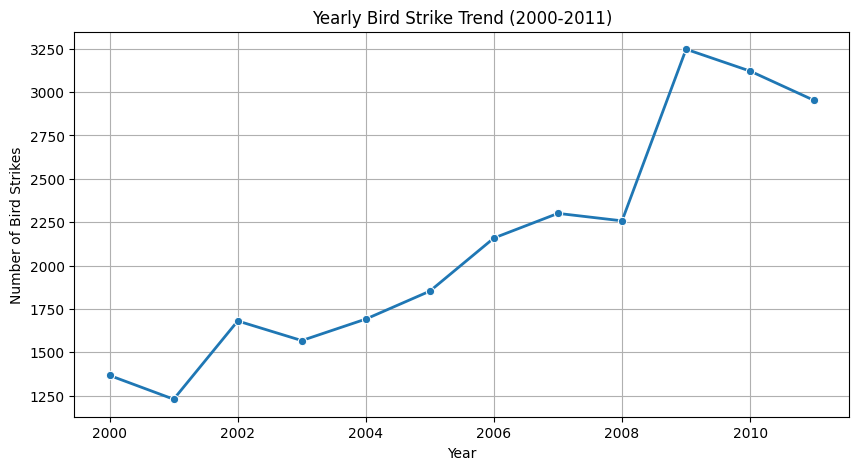

In [ ]:
#Yearly Bird Strikes Trens
plt.figure(figsize=(10,5))
yearly_counts = df['Incident Year'].value_counts().sort_index()
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o', linewidth=2)
plt.xlabel("Year")
plt.ylabel("Number of Bird Strikes")
plt.title("Yearly Bird Strike Trend (2000-2011)")
plt.grid()
plt.show()


<ipython-input-11-d6be0a5a4936>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_airlines.index, y=top_airlines.values, palette='viridis')


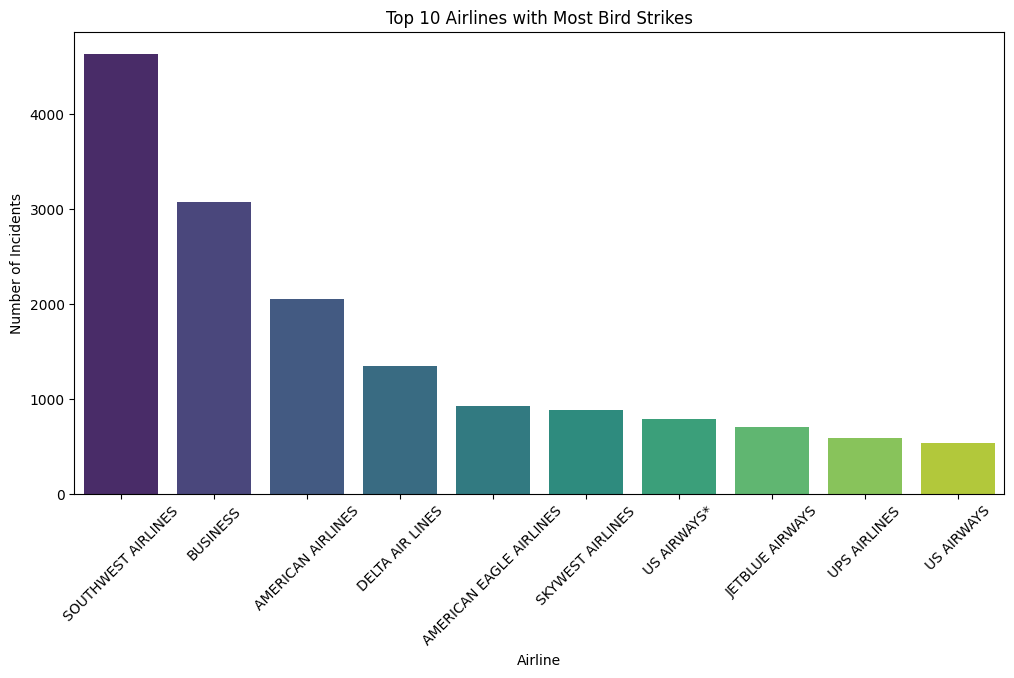

In [ ]:
# Top 10 Airlines with Most Bird Strikes
top_airlines = df['Aircraft: Airline/Operator'].value_counts().nlargest(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_airlines.index, y=top_airlines.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel("Airline")
plt.ylabel("Number of Incidents")
plt.title("Top 10 Airlines with Most Bird Strikes")
plt.show()

<ipython-input-12-faf4e6f9803c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_airports.index, x=top_airports.values, palette='coolwarm')


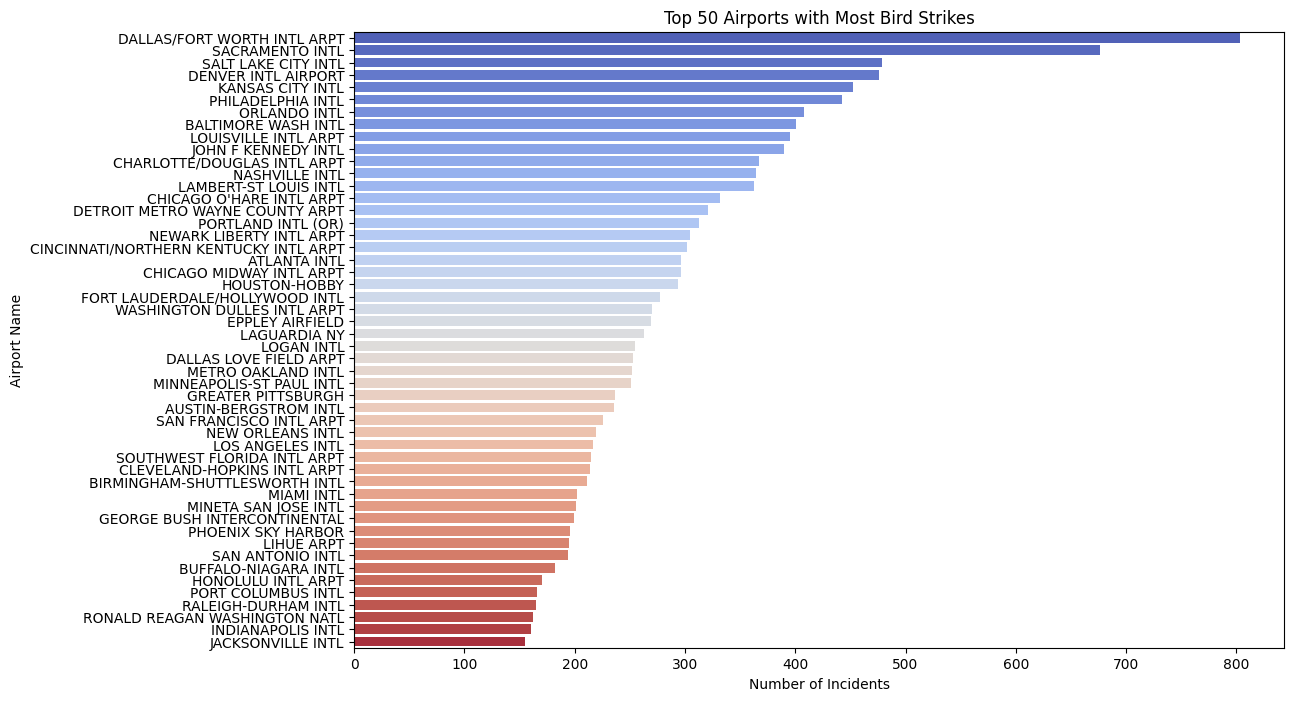

In [ ]:
# Top 50 Airports with the Most Incidents
top_airports = df['Airport: Name'].value_counts().nlargest(50)
plt.figure(figsize=(12,8))
sns.barplot(y=top_airports.index, x=top_airports.values, palette='coolwarm')
plt.xlabel("Number of Incidents")
plt.ylabel("Airport Name")
plt.title("Top 50 Airports with Most Bird Strikes")
plt.show()

<ipython-input-13-199e4e67c260>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cost: Total $'] = pd.to_numeric(df['Cost: Total $'], errors='coerce')  # Convert cost to numeric


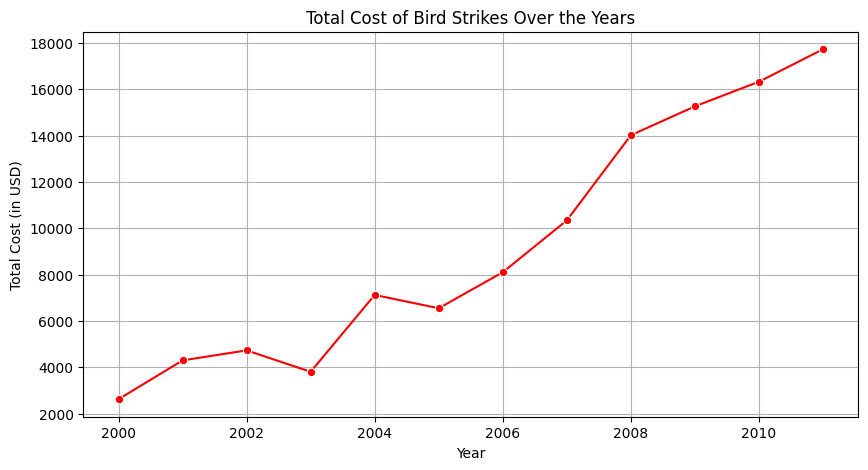

In [ ]:
# Cost Analysis Over the Years
df['Cost: Total $'] = pd.to_numeric(df['Cost: Total $'], errors='coerce')  # Convert cost to numeric
yearly_cost = df.groupby('Incident Year')['Cost: Total $'].sum()
plt.figure(figsize=(10,5))
sns.lineplot(x=yearly_cost.index, y=yearly_cost.values, marker='o', color='r')
plt.xlabel("Year")
plt.ylabel("Total Cost (in USD)")
plt.title("Total Cost of Bird Strikes Over the Years")
plt.grid()
plt.show()

<ipython-input-14-0a63d348fee5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=phase_counts.index, y=phase_counts.values, palette='Set2')


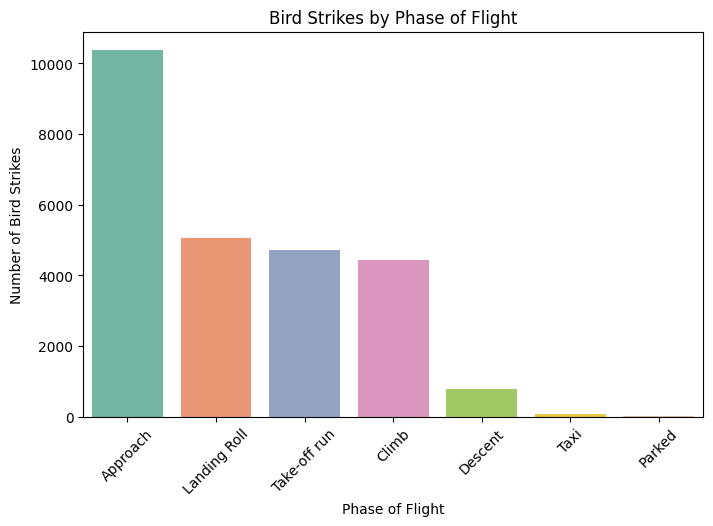

In [ ]:
# Bird Strikes by Phase of Flight
plt.figure(figsize=(8,5))
phase_counts = df['When: Phase of flight'].value_counts()
sns.barplot(x=phase_counts.index, y=phase_counts.values, palette='Set2')
plt.xlabel("Phase of Flight")
plt.ylabel("Number of Bird Strikes")
plt.xticks(rotation=45)
plt.title("Bird Strikes by Phase of Flight")
plt.show()

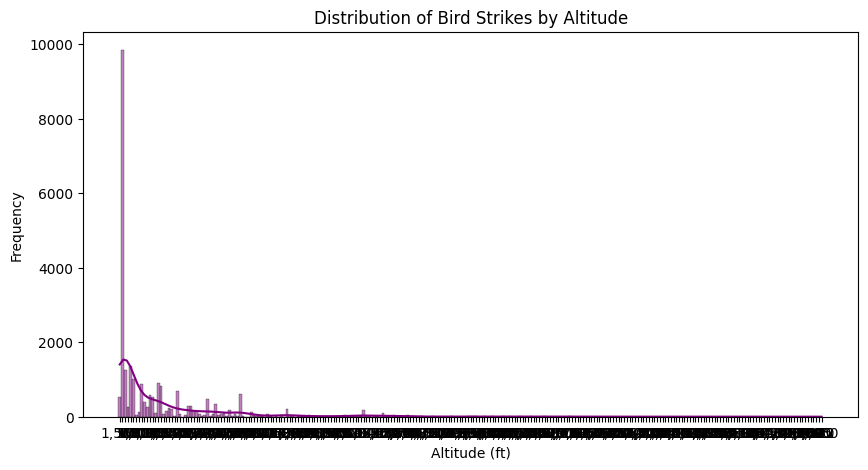

In [ ]:
# Altitude Analysis
plt.figure(figsize=(10,5))
sns.histplot(df['Feet above ground'], bins=20, kde=True, color='purple')
plt.xlabel("Altitude (ft)")
plt.ylabel("Frequency")
plt.title("Distribution of Bird Strikes by Altitude")
plt.show()


<ipython-input-16-5c42a4b40f1c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pilot warned of birds or wildlife?', data=df, palette='cool')


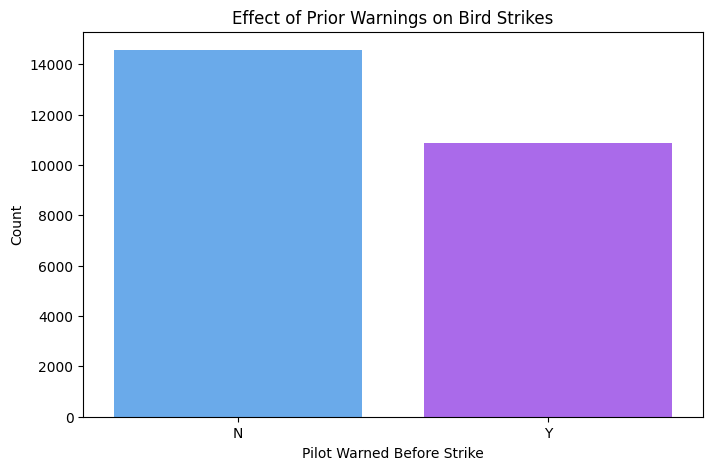

In [ ]:
# Pilot Awareness & Strike Impact
plt.figure(figsize=(8,5))
sns.countplot(x='Pilot warned of birds or wildlife?', data=df, palette='cool')
plt.xlabel("Pilot Warned Before Strike")
plt.ylabel("Count")
plt.title("Effect of Prior Warnings on Bird Strikes")
plt.show()